# 1. Daten

In [159]:
# Exp 2ml: G actin
# Values checked

import pandas as pd

Zeit_t0_Messreihe1_min = [5, 10, 15, 20, 30, 40, 50, 60, 70]
Rollzeit_tM_Messreihe1_s = [7.35, 42.38, 23.28, 23.27, 30.57, 28.85, 25.49, 29.1, 31.0]
Strecke_s_Messreihe1_cm = [7, 1, 1, 1, 1.6, 1, 1, 1, 1]

Zeit_t0_Messreihe2_min = [5, 10, 15, 20, 30, 40, 50, 60, 70]
Rollzeit_tM_Messreihe2_s = [2.6, 13, 40.7, 23.0, 150, 52, 83, 29.45, 61]
Strecke_s_Messreihe2_cm = [7, 1, 1, 1, 1, 1, 1, 1, 1]

Winkel_phi_Messreihe_deg = [30, 30, 45, 45, 60, 75, 75, 75, 75]

In [160]:
# Fehlerrechnung
Zeit_t0_Messreihe1_Fehler_min = []
Rollzeit_tM_Messreihe1_Fehler_s = []
Strecke_s_Messreihe1_Fehler_cm = []

Zeit_t0_Messreihe2_Fehler_min = []
Rollzeit_tM_Messreihe2_Fehler_s = []
Strecke_s_Messreihe2_Fehler_cm = []

Winkel_phi_Messreihe_Fehler_deg = [1, 1, 1, 1, 1, 1, 1, 1, 1]


In [161]:
import pandas as pd
import numpy as np

df_raw = pd.DataFrame({
    "Zeit_t0_Messreihe1_min": Zeit_t0_Messreihe1_min,
    "Rollzeit_tM_Messreihe1_s": Rollzeit_tM_Messreihe1_s,
    "Strecke_s_Messreihe1_cm": Strecke_s_Messreihe1_cm,
    "Zeit_t0_Messreihe2_min": Zeit_t0_Messreihe2_min,
    "Rollzeit_tM_Messreihe2_s": Rollzeit_tM_Messreihe2_s,
    "Strecke_s_Messreihe2_cm": Strecke_s_Messreihe2_cm,
    "Winkel_phi_Messreihe1_deg": Winkel_phi_Messreihe_deg,
})

print(df_raw)

   Zeit_t0_Messreihe1_min  Rollzeit_tM_Messreihe1_s  Strecke_s_Messreihe1_cm  \
0                       5                      7.35                      7.0   
1                      10                     42.38                      1.0   
2                      15                     23.28                      1.0   
3                      20                     23.27                      1.0   
4                      30                     30.57                      1.6   
5                      40                     28.85                      1.0   
6                      50                     25.49                      1.0   
7                      60                     29.10                      1.0   
8                      70                     31.00                      1.0   

   Zeit_t0_Messreihe2_min  Rollzeit_tM_Messreihe2_s  Strecke_s_Messreihe2_cm  \
0                       5                      2.60                        7   
1                      10              

# 2. Fehlerberechnung + (Ausreißer?)

In [162]:
# 2.1 Fehler der Strecke berechnen
import math
from typing import Union

Number = Union[int, float]

def streckenunsicherheit(b: Number) -> float:
    """
    Berechnet die Typ-B-Standardunsicherheit der Strecke bei Rechteckverteilung.

    Annahme:
      - b ist die geschätzte maximale Abweichung (±b) der Strecke (gleiche Einheit wie die Strecke).
      - Rechteckverteilung => u(s) = b / sqrt(3)

    Parameter
    ----------
    b : int | float
        Maximale Abweichung (±b), z.B. b=0.2 für ±0.2 mm.

    Returns
    -------
    float
        Standardunsicherheit u(s) in derselben Einheit wie b.
    """
    if b < 0:
        raise ValueError("b muss >= 0 sein (maximale Abweichung als Betrag).")
    return b/ math.sqrt(3)

b = 0.2  # cm (entspricht ±0.2 mm)
strecken_error_cm = streckenunsicherheit(b)
print(f"strecken_error_cm: {strecken_error_cm} cm")

Strecke_s_Messreihe1_Fehler_cm = [strecken_error_cm] * 9
Strecke_s_Messreihe2_Fehler_cm = [strecken_error_cm] * 9
print("Strecke_s_Messreihe1_Fehler_cm:", Strecke_s_Messreihe1_Fehler_cm)
print("Strecke_s_Messreihe2_Fehler_cm:", Strecke_s_Messreihe2_Fehler_cm)

strecken_error_cm: 0.11547005383792516 cm
Strecke_s_Messreihe1_Fehler_cm: [0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516]
Strecke_s_Messreihe2_Fehler_cm: [0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516, 0.11547005383792516]


In [163]:
# 2.2 Fehler der Rollzeit berechnen
import math

def rollzeitunsicherheit(a_s: float) -> float:
    """
    Berechnet die Typ-B-Standardunsicherheit der Rollzeit bei manueller Stopuhrmessung.

    Annahmen:
    - a_s: maximale Abweichung (±a) der Reaktionszeit pro Klick in Sekunden
    - Zwei unabhängige Klicks: Start und Stop
    - Rechteckverteilung pro Klick

    Formel:
    u(t_M) = sqrt(2) * a / sqrt(3)

    Rückgabe:
    - Unsicherheit in Sekunden
    """
    if a_s < 0:
        raise ValueError("a muss positiv sein.")
    return math.sqrt(2) * a_s / math.sqrt(3)

a = 1  # Sekunden (±1 s Reaktionszeit pro Klick)

u_t = rollzeitunsicherheit(a)
print("Rollzeit-Unsicherheit u(t_M):")
print(f"u(t_M) = {u_t:.4f} s")

Rollzeit_tM_Messreihe1_Fehler_s = [u_t] * 9
Rollzeit_tM_Messreihe2_Fehler_s = [u_t] * 9
print("Rollzeit_tM_Messreihe1_Fehler_s:", Rollzeit_tM_Messreihe1_Fehler_s)
print("Rollzeit_tM_Messreihe2_Fehler_s:", Rollzeit_tM_Messreihe2_Fehler_s)

Rollzeit-Unsicherheit u(t_M):
u(t_M) = 0.8165 s
Rollzeit_tM_Messreihe1_Fehler_s: [0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261]
Rollzeit_tM_Messreihe2_Fehler_s: [0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261, 0.8164965809277261]


In [164]:
# 2.3 Fehler des Winkel berechnen
import math

def winkelunsicherheit_typ_b(c_deg: float) -> float:
    """
    Typ-B-Standardunsicherheit eines Winkels bei Rechteckverteilung.
    c_deg: maximale Abweichung in Grad (z.B. 1 für ±1°)

    Rückgabe:
    - Unsicherheit in Radiant
    """
    c_rad = math.radians(c_deg)
    return c_rad / math.sqrt(3)


# Beispiel:
u_phi = winkelunsicherheit_typ_b(1.0)
print(u_phi)  # ≈ 0.0101 rad

import math

def rad2deg(x_rad: float) -> float:
    return x_rad * 180.0 / math.pi

def deg2rad(x_deg: float) -> float:
    return x_deg * math.pi / 180.0


# Beispiel:
u_phi_rad = 0.0101
print(f"rad2deg(u_phi_rad): {rad2deg(u_phi_rad)}°")  # ≈ 0.579°

Winkel_phi_Messreihe_Fehler_deg = [rad2deg(u_phi)] * 9
print("Winkel_phi_Messreihe1_Fehler_deg:", Winkel_phi_Messreihe_Fehler_deg)    

Winkel_phi_Messreihe_Fehler_rad = [u_phi] * 9
print("Winkel_phi_Messreihe2_Fehler_rad:", Winkel_phi_Messreihe_Fehler_rad)



0.010076663134634544
rad2deg(u_phi_rad): 0.5786873730821314°
Winkel_phi_Messreihe1_Fehler_deg: [0.5773502691896258, 0.5773502691896258, 0.5773502691896258, 0.5773502691896258, 0.5773502691896258, 0.5773502691896258, 0.5773502691896258, 0.5773502691896258, 0.5773502691896258]
Winkel_phi_Messreihe2_Fehler_rad: [0.010076663134634544, 0.010076663134634544, 0.010076663134634544, 0.010076663134634544, 0.010076663134634544, 0.010076663134634544, 0.010076663134634544, 0.010076663134634544, 0.010076663134634544]


In [165]:
# 2.4 Zeitmessfehler 
Zeit_t0_Messreihe1_Fehler_min = [0.5] * 9
print("Zeit_t0_Messreihe1_Fehler_min:", Zeit_t0_Messreihe1_Fehler_min)
Zeit_t0_Messreihe2_Fehler_min = [0.5] * 9
print("Zeit_t0_Messreihe2_Fehler_min:", Zeit_t0_Messreihe2_Fehler_min)

Zeit_t0_Messreihe1_Fehler_min: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Zeit_t0_Messreihe2_Fehler_min: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


In [166]:
cols = {
    "Zeit_t0_Messreihe1_min": Zeit_t0_Messreihe1_min,
    "Zeit_t0_Messreihe1_Fehler_min": Zeit_t0_Messreihe1_Fehler_min,
    "Rollzeit_tM_Messreihe1_s": Rollzeit_tM_Messreihe1_s,
    "Rollzeit_tM_Messreihe1_Fehler_s": Rollzeit_tM_Messreihe1_Fehler_s,
    "Strecke_s_Messreihe1_cm": Strecke_s_Messreihe1_cm,
    "Strecke_s_Messreihe1_Fehler_cm": Strecke_s_Messreihe1_Fehler_cm,
    "Zeit_t0_Messreihe2_min": Zeit_t0_Messreihe2_min,
    "Zeit_t0_Messreihe2_Fehler_min": Zeit_t0_Messreihe2_Fehler_min,
    "Rollzeit_tM_Messreihe2_s": Rollzeit_tM_Messreihe2_s,
    "Rollzeit_tM_Messreihe2_Fehler_s": Rollzeit_tM_Messreihe2_Fehler_s,
    "Strecke_s_Messreihe2_cm": Strecke_s_Messreihe2_cm,
    "Strecke_s_Messreihe2_Fehler_cm": Strecke_s_Messreihe2_Fehler_cm,
    "Winkel_phi_Messreihe1_Fehler_deg": Winkel_phi_Messreihe1_Fehler_deg,
    "Winkel_phi_Messreihe2_Fehler_rad": Winkel_phi_Messreihe2_Fehler_rad,
}

for k, v in cols.items():
    try:
        print(f"{k:35s} len={len(v)}")
    except TypeError:
        print(f"{k:35s} ist kein Array/Listentyp (Typ: {type(v)})")


Zeit_t0_Messreihe1_min              len=9
Zeit_t0_Messreihe1_Fehler_min       len=9
Rollzeit_tM_Messreihe1_s            len=9
Rollzeit_tM_Messreihe1_Fehler_s     len=9
Strecke_s_Messreihe1_cm             len=9
Strecke_s_Messreihe1_Fehler_cm      len=9
Zeit_t0_Messreihe2_min              len=9
Zeit_t0_Messreihe2_Fehler_min       len=9
Rollzeit_tM_Messreihe2_s            len=9
Rollzeit_tM_Messreihe2_Fehler_s     len=9
Strecke_s_Messreihe2_cm             len=9
Strecke_s_Messreihe2_Fehler_cm      len=9
Winkel_phi_Messreihe1_Fehler_deg    len=9
Winkel_phi_Messreihe2_Fehler_rad    len=9


In [167]:
df = pd.DataFrame({
    "Zeit_t0_Messreihe1_min": Zeit_t0_Messreihe1_min,
    "Zeit_t0_Messreihe1_Fehler_min": Zeit_t0_Messreihe1_Fehler_min,
    "Rollzeit_tM_Messreihe1_s": Rollzeit_tM_Messreihe1_s,
    "Rollzeit_tM_Messreihe1_Fehler_s": Rollzeit_tM_Messreihe1_Fehler_s,
    "Strecke_s_Messreihe1_cm": Strecke_s_Messreihe1_cm,
    "Strecke_s_Messreihe1_Fehler_cm": Strecke_s_Messreihe1_Fehler_cm,
    "Zeit_t0_Messreihe2_min": Zeit_t0_Messreihe2_min,
    "Zeit_t0_Messreihe2_Fehler_min": Zeit_t0_Messreihe2_Fehler_min,
    "Rollzeit_tM_Messreihe2_s": Rollzeit_tM_Messreihe2_s,
    "Rollzeit_tM_Messreihe2_Fehler_s": Rollzeit_tM_Messreihe2_Fehler_s,
    "Strecke_s_Messreihe2_cm": Strecke_s_Messreihe2_cm,
    "Strecke_s_Messreihe2_Fehler_cm": Strecke_s_Messreihe2_Fehler_cm,
    "Winkel_phi_Messreihe1_deg": Winkel_phi_Messreihe_deg,
    "Winkel_phi_Messreihe1_Fehler_deg": Winkel_phi_Messreihe_Fehler_deg,
    "Winkel_phi_Messreihe2_Fehler_rad": Winkel_phi_Messreihe_Fehler_rad,
})


print(df)

   Zeit_t0_Messreihe1_min  Zeit_t0_Messreihe1_Fehler_min  \
0                       5                            0.5   
1                      10                            0.5   
2                      15                            0.5   
3                      20                            0.5   
4                      30                            0.5   
5                      40                            0.5   
6                      50                            0.5   
7                      60                            0.5   
8                      70                            0.5   

   Rollzeit_tM_Messreihe1_s  Rollzeit_tM_Messreihe1_Fehler_s  \
0                      7.35                         0.816497   
1                     42.38                         0.816497   
2                     23.28                         0.816497   
3                     23.27                         0.816497   
4                     30.57                         0.816497   
5              

# 3. Geschwindigkeit u

In [168]:
# 3.1 u
df["u1_cm_s"] = df["Strecke_s_Messreihe1_cm"] / df["Rollzeit_tM_Messreihe1_s"]
df["u2_cm_s"] = df["Strecke_s_Messreihe2_cm"] / df["Rollzeit_tM_Messreihe2_s"]
print(df)

   Zeit_t0_Messreihe1_min  Zeit_t0_Messreihe1_Fehler_min  \
0                       5                            0.5   
1                      10                            0.5   
2                      15                            0.5   
3                      20                            0.5   
4                      30                            0.5   
5                      40                            0.5   
6                      50                            0.5   
7                      60                            0.5   
8                      70                            0.5   

   Rollzeit_tM_Messreihe1_s  Rollzeit_tM_Messreihe1_Fehler_s  \
0                      7.35                         0.816497   
1                     42.38                         0.816497   
2                     23.28                         0.816497   
3                     23.27                         0.816497   
4                     30.57                         0.816497   
5              

In [169]:
# 3.2 Fehler von u berechnen
def geschw_unsicherheit(s, t, us, ut):
    return np.sqrt( (us / t)**2 + (s * ut / t**2)**2 )

df["u1_Fehler_cm_s"] = geschw_unsicherheit(
    df["Strecke_s_Messreihe1_cm"],
    df["Rollzeit_tM_Messreihe1_s"],
    df["Strecke_s_Messreihe1_Fehler_cm"],
    df["Rollzeit_tM_Messreihe1_Fehler_s"],
)

df["u2_Fehler_cm_s"] = geschw_unsicherheit(
    df["Strecke_s_Messreihe2_cm"],
    df["Rollzeit_tM_Messreihe2_s"],
    df["Strecke_s_Messreihe2_Fehler_cm"],
    df["Rollzeit_tM_Messreihe2_Fehler_s"],
)
print (df)

   Zeit_t0_Messreihe1_min  Zeit_t0_Messreihe1_Fehler_min  \
0                       5                            0.5   
1                      10                            0.5   
2                      15                            0.5   
3                      20                            0.5   
4                      30                            0.5   
5                      40                            0.5   
6                      50                            0.5   
7                      60                            0.5   
8                      70                            0.5   

   Rollzeit_tM_Messreihe1_s  Rollzeit_tM_Messreihe1_Fehler_s  \
0                      7.35                         0.816497   
1                     42.38                         0.816497   
2                     23.28                         0.816497   
3                     23.27                         0.816497   
4                     30.57                         0.816497   
5              

In [170]:
# 3.3 Gemittelte Geschwindigkeit
df["u_mittel_cm_s"] = 0.5 * (df["u1_cm_s"] + df["u2_cm_s"])


In [171]:
# 3.4 Fehler der gemittelten Geschwindigkeit
df["u_mittel_Fehler_cm_s"] = 0.5 * np.sqrt(
    df["u1_Fehler_cm_s"]**2 + df["u2_Fehler_cm_s"]**2
)
print(df)

   Zeit_t0_Messreihe1_min  Zeit_t0_Messreihe1_Fehler_min  \
0                       5                            0.5   
1                      10                            0.5   
2                      15                            0.5   
3                      20                            0.5   
4                      30                            0.5   
5                      40                            0.5   
6                      50                            0.5   
7                      60                            0.5   
8                      70                            0.5   

   Rollzeit_tM_Messreihe1_s  Rollzeit_tM_Messreihe1_Fehler_s  \
0                      7.35                         0.816497   
1                     42.38                         0.816497   
2                     23.28                         0.816497   
3                     23.27                         0.816497   
4                     30.57                         0.816497   
5              

In [172]:
df[[
    "Zeit_t0_Messreihe1_min",
    "u1_cm_s", "u1_Fehler_cm_s",
    "u2_cm_s", "u2_Fehler_cm_s",
    "u_mittel_cm_s", "u_mittel_Fehler_cm_s"
]]


,Zeit_t0_Messreihe1_min,u1_cm_s,u1_Fehler_cm_s,u2_cm_s,u2_Fehler_cm_s,u_mittel_cm_s,u_mittel_Fehler_cm_s
0,5,0.952381,0.106958,2.692308,0.846650,1.822344,0.426690
1,10,0.023596,0.002762,0.076923,0.010111,0.050260,0.005241
2,15,0.042955,0.005184,0.024570,0.002880,0.033763,0.002965
3,20,0.042974,0.005186,0.043478,0.005252,0.043226,0.003691
4,30,0.052339,0.004028,0.006667,0.000771,0.029503,0.002050
5,40,0.034662,0.004121,0.019231,0.002241,0.026946,0.002345
6,50,0.039231,0.004701,0.012048,0.001396,0.025640,0.002452
7,60,0.034364,0.004084,0.033956,0.004032,0.034160,0.002869
8,70,0.032258,0.003821,0.016393,0.001906,0.024326,0.002135


# 4. Viskosität

In [173]:
# # Konstanten -> siehe poly1!
# K = 0.000583           # Korrekturfaktor
# d_kugel_cm = 0.06       # cm

# g = 9.81 * 100            # cm/s^2
# roh_water = 1          # g/cm^3
# roh_kugel = 7.85       # g/cm^3 (aus Skript)

In [174]:
# import math
# # Durchmesser Kapillare
# # Rechnung - Volumen = 100µl -> *10^-6 -> 100l -> *10^3 -> cm^3 
# # Formel: V = π r^2 * h (G = Grundfläche Kreis und h = Höhe)
# V = 100 # µl = 0.001 cm^3
# V = V * 0.001 # cm^3
# h = 9 # cm

# r_kapillare_cm = math.sqrt(V/(math.pi * h))
# print(f"Radius {r_kapillare_cm} cm")
        
# d_kapillare_cm = r_kapillare_cm*2
# print(f"Durchmesser {d_kapillare_cm} cm")


In [175]:
# # 4.1 Viskositätsformel
# import math

# def viscosity_formula(K: float, roh_fluid: float, roh_shape: float,
#                       angle: float, d_tube: float, d_shape: float,
#                       g: float, velocity: float):
    
#     numerator = (5 * math.pi / 42) * K * (d_shape ** 2) * roh_fluid * g * math.sin(math.radians(angle))
#     correction = (roh_shape - roh_fluid) / roh_fluid * (d_tube + d_shape) / d_shape
    
#     viscosity = numerator * correction / velocity
#     return viscosity * 100

In [176]:
import math

def viscosity_formula_4_1(
    K: float,               # Korrekturfaktor
    roh_fluid: float,       # g/cm^3
    roh_kugel: float,       # g/cm^3
    phi_deg: float,         # Grad
    d_kapillare_cm: float,  # cm
    d_kugel_cm: float,      # cm
    g_cm_s2: float,         # cm/s^2
    velocity_cm_s: float    # cm/s
) -> float:
    """
    Formel 4.1 in cgs-Einheiten (cm, s, g).
    Rückgabe: Viskosität in mPa*s.
    """
    if velocity_cm_s <= 0:
        raise ValueError("velocity_cm_s muss > 0 sein.")

    phi_rad = math.radians(phi_deg)

    # entspricht deinem 'numerator'
    prefactor = (5.0 * math.pi / 42.0) * K
    numerator = prefactor * (d_kugel_cm ** 2) * roh_fluid * g_cm_s2 * math.sin(phi_rad)

    # entspricht deinem 'correction'
    correction = ((roh_kugel - roh_fluid) / roh_fluid) * ((d_kapillare_cm + d_kugel_cm) / d_kugel_cm)

    # Viskosität in Poise (g/(cm*s))
    eta_poise = (numerator * correction) / velocity_cm_s

    # 1 Poise = 0.1 Pa*s = 100 mPa*s
    eta_mPa_s = eta_poise * 100.0
    return eta_mPa_s


In [177]:
def constant_C_cgs(
    K: float,
    roh_fluid: float,
    roh_kugel: float,
    d_kapillare_cm: float,
    d_kugel_cm: float,
    g_cm_s2: float
) -> float:
    """
    C so, dass gilt: eta_poise = (C * sin(phi)) / u   (u in cm/s, phi in rad)
    Rückgabe: C in (Poise * cm/s) = g/(cm*s) * cm/s = g/cm
    """
    prefactor = (5.0 * math.pi / 42.0) * K
    correction = ((roh_kugel - roh_fluid) / roh_fluid) * ((d_kapillare_cm + d_kugel_cm) / d_kugel_cm)
    C = prefactor * (d_kugel_cm ** 2) * roh_fluid * g_cm_s2 * correction
    return C


In [178]:
# Konstanten aus deinem Screenshot
K = 0.000583
d_kugel_cm = 0.06
g_cm_s2 = 9.81 * 100
roh_water = 1.0
roh_kugel = 7.85

# d_kapillare_cm aus deiner Rechnung (hier als Beispielwert einsetzen)
d_kapillare_cm = 0.11894160774351809

# eta (mPa*s) aus gemittelter Geschwindigkeit
df["eta_mPa_s"] = df.apply(
    lambda r: viscosity_formula_4_1(
        K=K,
        roh_fluid=roh_water,
        roh_kugel=roh_kugel,
        phi_deg=r["Winkel_phi_Messreihe1_deg"],
        d_kapillare_cm=d_kapillare_cm,
        d_kugel_cm=d_kugel_cm,
        g_cm_s2=g_cm_s2,
        velocity_cm_s=r["u_mittel_cm_s"],
    ),
    axis=1
)


In [179]:
# 4.2 Viskositätsfehlerberechnung
import numpy as np

def eta_uncertainty_from_C(u_bar, du_bar, phi_deg, dphi_deg, C):
    phi = np.deg2rad(phi_deg)
    dphi = np.deg2rad(dphi_deg)

    term_phi = (C * np.cos(phi) / u_bar * dphi) ** 2
    term_u   = (C * np.sin(phi) / (u_bar**2) * du_bar) ** 2

    # Ergebnis in Poise; danach in mPa*s
    d_eta_poise = np.sqrt(term_phi + term_u)
    return d_eta_poise * 100.0

C = constant_C_cgs(K, roh_water, roh_kugel, d_kapillare_cm, d_kugel_cm, g_cm_s2)

df["eta_Fehler_mPa_s"] = eta_uncertainty_from_C(
    df["u_mittel_cm_s"].to_numpy(),
    df["u_mittel_Fehler_cm_s"].to_numpy(),
    df["Winkel_phi_Messreihe1_deg"].to_numpy(),
    df["Winkel_phi_Messreihe1_Fehler_deg"].to_numpy(),
    C
)


In [182]:
df[[
    "Zeit_t0_Messreihe1_min",
    "u_mittel_cm_s", "u_mittel_Fehler_cm_s",
    "eta_mPa_s", "eta_Fehler_mPa_s"
]]

,Zeit_t0_Messreihe1_min,u_mittel_cm_s,u_mittel_Fehler_cm_s,eta_mPa_s,eta_Fehler_mPa_s
0,5,1.822344,0.426690,0.431619,0.101341
1,10,0.050260,0.005241,15.649939,1.654621
2,15,0.033763,0.002965,32.946513,2.912273
3,20,0.043226,0.003691,25.733628,2.212402
4,30,0.029503,0.002050,46.177348,3.220391
5,40,0.026946,0.002345,56.390275,4.910573
6,50,0.025640,0.002452,59.264319,5.669952
7,60,0.034160,0.002869,44.482221,3.738425
8,70,0.024326,0.002135,62.465293,5.484212


# 5. Plotting & sigmoidal fit 

Einheiten! x-y
...

Fitgüte
Wendepunkt

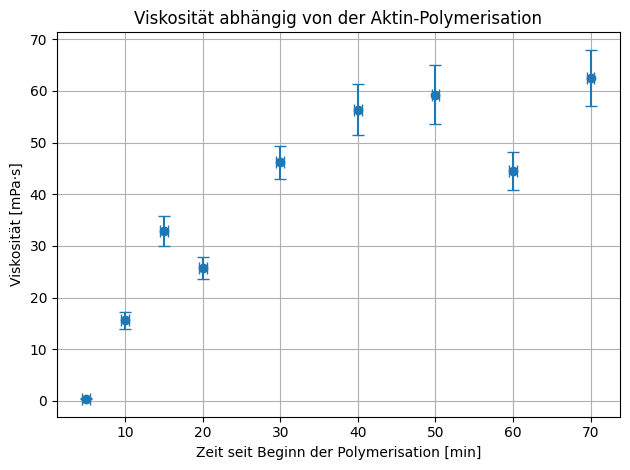

In [183]:
import matplotlib.pyplot as plt

x = df["Zeit_t0_Messreihe1_min"]
xerr = df["Zeit_t0_Messreihe1_Fehler_min"]
y = df["eta_mPa_s"]
yerr = df["eta_Fehler_mPa_s"]

plt.figure()
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', capsize=4)
plt.xlabel("Zeit seit Beginn der Polymerisation [min]")
plt.ylabel("Viskosität [mPa·s]")
plt.title("Viskosität abhängig von der Aktin-Polymerisation")
plt.grid(True)
plt.tight_layout()
plt.show()
